# Q1 : k-Nearest Neighbor (kNN)


The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples

For the purposes of this problem consider the N-armed spiral dataset where each arm represents a different class. Use the dataset generator in th following code cell.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def prepare_dataset():
  N = 100 # number of points per class
  D = 2 # dimensionality
  K = 3 # number of classes

  X = np.zeros((N*K,D)) # data matrix (each row = single example)
  Y = np.zeros(N*K, dtype='uint8') # class labels
  for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
  # lets visualize the data:
  plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
  plt.show()
  return X, Y

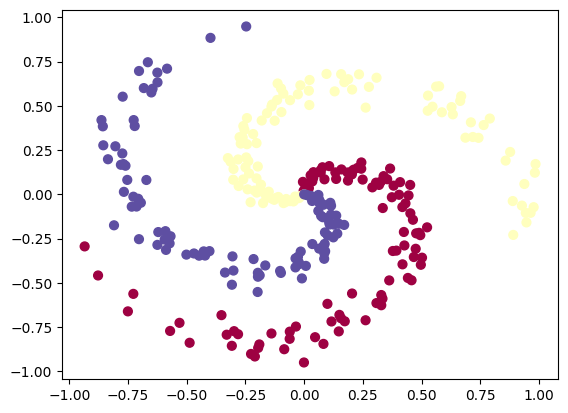

In [ ]:
X,Y = prepare_dataset()


In [ ]:
print(Y.shape, X.shape)

(300,) (300, 2)


In [ ]:
print(X[0].shape)

(2,)


Complete the KNN classifier class  class to create an classifier model object that fits to the data (X, Y) generated  by prepare_dataset(). Using the above dataset (X,Y) fit your K-Nearest Neighbour Classifier

- Q-1.1 Pick 5 random sample points in range [-1, 1] X [-1, 1] and print model's prediction on the same.
- Q-1.2 Ablate for the above for k=2,5,10 \
- Q-1.3 plot the sample points superimposed on the data (annotate them with a different colour) and display the same

In [ ]:
class KNN_Classifier:
    def __init__(self,  X, Y, k=1):
        '''
        Args:
            X ((num_samples, D) dimensional numpy.ndarray): input feature data
            Y ((num_samples,) dimensional numpy.ndarray): labels, represented as non negative integers
            k (int): number of nearest neighbours
        '''
        # implement your code here
        super().__init__()
        self.X=X
        self.Y=Y
        self.k=k
        #pass

    def distance(self, a, b, type='eucledian'):
        '''
        Args:
            a ((D,) dimensional numpy.ndarray):
            b ((D,) dimensional numpy.ndarray):
            type (string): Either of "eucledian" or "manhattan" distance
        '''
        if type=='eucledian':
            # Implement your code
            sum=0
            for i in range(int(a.shape[0])):
              sum+=(a[i]-b[i])**2
            sum=sum**0.5
            #print(sum)
            return sum

        elif type=='manhattan':
            # Implement your code
            sum=0
            for i in range(int(a.shape[0])):
              sum+=np.abs(a[i]-b[i])
            return sum

    def predict(self, x):
        '''
        Args:
            x ((D,) dimensional numpy.ndarray): input sample
        Returns:
            prediction (an integer), a  mlabel
        '''

        # Implement knn inference
        distances={}
        for i in range(int(self.X.shape[0])):
          distances[i]=self.distance(self.X[i],x)

        v=[val for val in distances.values()]
        v.sort()
        v=v[0:self.k]

        topk=[]
        for ke in distances.keys():
          for vi in v:
            if distances[ke]==vi:
              topk.append(self.Y[ke])
        ls=list(set(topk))
        pred={k1:0 for k1 in ls}
        for i in ls:
          for j in topk:
            if i==j:
              pred[i]+=1
        val=np.array(list(pred.values())).max()
        valu = [i for i in pred if pred[i]==val]
        print("Predicted Label for ",x,"for k = ",self.k," is : Class ",valu[0])
        return None




################ Solution for Q1.1 ###########################################  

Predicted Label for  [-0.03515117 -1.1584492 ] for k =  2  is : Class  0
Predicted Label for  [-1.9385629   0.85977569] for k =  2  is : Class  2
Predicted Label for  [ 1.14106694 -0.81532509] for k =  2  is : Class  1
Predicted Label for  [ 0.25345331 -0.83354784] for k =  2  is : Class  0
Predicted Label for  [-1.08922984 -1.56718777] for k =  2  is : Class  0



################ Solution for Q1.2 ###########################################  

Predicted Label for  [-0.03515117 -1.1584492 ] for k =  2  is : Class  0
Predicted Label for  [-1.9385629   0.85977569] for k =  2  is : Class  2
Predicted Label for  [ 1.14106694 -0.81532509] for k =  2  is : Class  1
Predicted Label for  [ 0.25345331 -0.83354784] for k =  2  is : Class  0
Predicted Label for  [-1.08922984 -1.56718777] for k =  2  is : Class  0
Predicted Label for  [-0.03515117 -1.1584492 ] for k =  4  is : Class  0
Predicted Label for  [-1.93

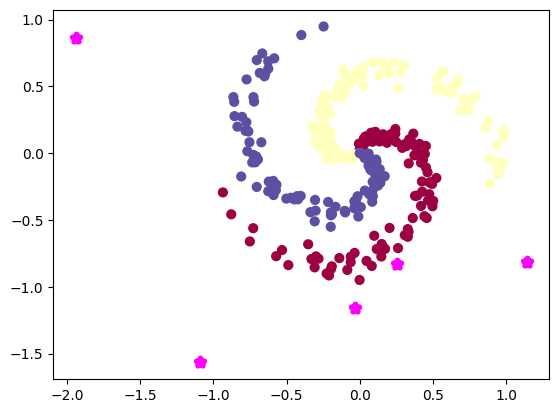

In [ ]:
'''
Code for Q1.1, Q1.2 and Q1.3 below
'''


x1=np.random.normal(-1,1,5)
x2=np.random.normal(-1,1,5)
xtest=np.stack((x1,x2),axis=-1)

#Q1.1
model=KNN_Classifier(X,Y,2)
print("\n\n\n################ Solution for Q1.1 ###########################################  \n")
for i in range(5):
  model.predict(xtest[i])

#Q1.2
print("\n\n\n################ Solution for Q1.2 ###########################################  \n")
for k in [2,4,5]:
  model=KNN_Classifier(X,Y,k)
  for i in range(5):
    model.predict(xtest[i])

#Q1.3
print("\n\n\n################ Solution for Q1.3 ###########################################  \n")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.scatter(xtest[:, 0], xtest[:, 1],color="magenta",marker="*",linewidths=4)
plt.show()


In [ ]:
xtest

array([[-3.87990943, -0.84860809],
       [ 0.27038005, -1.65308121],
       [-0.97136358, -0.80434984],
       [ 0.09421655, -2.47497532],
       [-1.95446543,  0.12667517]])

In [ ]:
xtest=[-0.32539826,  0.75331822]

#Q1.1
for k in [1,2,5,10]:
  model=KNN_Classifier(X,Y,k)
  print("For K= ",k)
  model.predict(xtest)



For K=  1
Predicted Label for  [-0.32539826, 0.75331822] for k =  1  is : Class  2
For K=  2
Predicted Label for  [-0.32539826, 0.75331822] for k =  2  is : Class  2
For K=  5
Predicted Label for  [-0.32539826, 0.75331822] for k =  5  is : Class  2
For K=  10
Predicted Label for  [-0.32539826, 0.75331822] for k =  10  is : Class  1
